
# Simulación de Transmisión Digital de un Mensaje Bluetooth
En este cuaderno, simularemos cómo se transmite un mensaje **Bluetooth** en forma de señal digital. Nos enfocaremos en un escenario de **emparejamiento**, donde un dispositivo se conecta a otro utilizando el protocolo **Bluetooth Low Energy (BLE)**.

---
## Introducción al Protocolo Bluetooth
Bluetooth es un estándar de comunicación inalámbrica utilizado para conectar dispositivos a corta distancia. Hay dos tipos principales:
- **Bluetooth Classic**: Utilizado para dispositivos que requieren un ancho de banda mayor (por ejemplo, auriculares).
- **Bluetooth Low Energy (BLE)**: Optimizado para baja energía, ideal para dispositivos IoT y sensores.

### Proceso de Emparejamiento en BLE
El emparejamiento es el proceso mediante el cual dos dispositivos Bluetooth intercambian información para establecer una **conexión segura**. Durante este proceso, los dispositivos intercambian varios paquetes para identificarse y establecer una clave de cifrado.

---
## Estructura del Mensaje de Emparejamiento
Un paquete típico en BLE contiene los siguientes campos:
1. **Preámbulo** (1 byte): Utilizado para sincronizar la transmisión.
2. **Acceso** (4 bytes): Código para verificar que el paquete es para el dispositivo correcto.
3. **Tipo de Paquete** (1 byte): Indica el tipo de mensaje (en este caso, emparejamiento).
4. **Longitud** (1 byte): Número de bytes en el campo de datos.
5. **Datos** (N bytes): Información real que se transmite.
6. **CRC** (3 bytes): Verificación de integridad.

---
## Paso 1: Definir el Mensaje de Emparejamiento


In [2]:

# Definir un mensaje de emparejamiento Bluetooth
import numpy as np

# Campos del mensaje
preamble = '10101010'  # 8 bits - 1 byte
access_address = '11001100110011001100110011001100'  # 4 bytes
packet_type = '00000001'  # 1 byte (emparejamiento)
length = '00000100'  # 1 byte (4 bytes de datos)
data = '1010011100101101'  # Datos aleatorios (2 bytes)
crc = '101010101010101010101010'  # 3 bytes (CRC de ejemplo)

# Concatenar todos los campos para formar el paquete
message = preamble + access_address + packet_type + length + data + crc

# Mostrar el mensaje completo
print(f"Mensaje completo en binario:{message}")
print(f"Longitud del mensaje: {len(message)} bits")


Mensaje completo en binario:101010101100110011001100110011001100110000000001000001001010011100101101101010101010101010101010
Longitud del mensaje: 96 bits



## Paso 2: Generación de la Señal Digital
Vamos a representar este mensaje como una **onda digital** utilizando 0s y 1s. Cada bit será representado por una señal cuadrada.


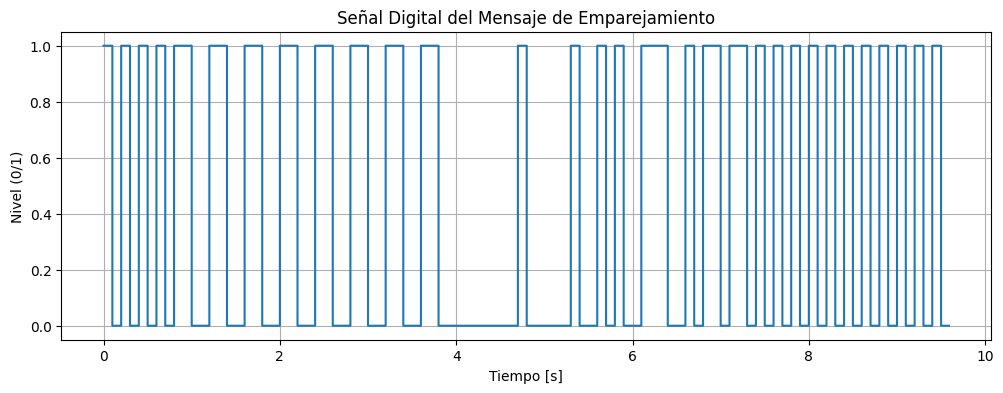

In [6]:

import matplotlib.pyplot as plt

# Parámetros de la señal
bit_duration = 0.1  # Duración de cada bit en segundos
t = np.arange(0, (len(message) * bit_duration)-0.01, 0.01)

# Generar la señal digital basada en el mensaje
signal = np.array([int(bit) for bit in message for _ in range(int(bit_duration / 0.01))])

# Visualizar la señal digital
plt.figure(figsize=(12, 4))
plt.step(t, signal, where='post')
plt.title("Señal Digital del Mensaje de Emparejamiento")
plt.xlabel("Tiempo [s]")
plt.ylabel("Nivel (0/1)")
plt.grid()
plt.show()



## Paso 3: Simulación de la Transmisión
Para la transmisión, se utiliza **modulación digital**. Aquí vamos a simular cómo se transmitirá el mensaje utilizando una onda portadora de alta frecuencia (como en Bluetooth).


In [8]:
# Parámetros de modulación
carrier_freq = 2.4e9  # Frecuencia portadora de Bluetooth (2.4 GHz)
sampling_rate = 1e6  # Tasa de muestreo (1 MHz)
t_carrier = np.arange(0, len(signal) * bit_duration, 1 / sampling_rate)

# Generar la onda portadora
carrier_wave = np.sin(2 * np.pi * carrier_freq * t_carrier)

# Asegurarnos de que la longitud del array `signal` sea igual a la de `carrier_wave`
samples_per_bit = int(sampling_rate * bit_duration)
modulated_signal = np.repeat(signal, samples_per_bit)

# Ajustar la longitud si es necesario
if len(modulated_signal) > len(carrier_wave):
    modulated_signal = modulated_signal[:len(carrier_wave)]
else:
    carrier_wave = carrier_wave[:len(modulated_signal)]

# Modulación (Multiplicación de la señal digital por la portadora)
modulated_signal = carrier_wave * modulated_signal

# Visualizar la señal modulada
plt.figure(figsize=(12, 4))
plt.plot(t_carrier[:1000], modulated_signal[:1000])
plt.title("Señal Modulada para Transmisión Bluetooth")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


## Conclusión
Hemos simulado la **transmisión digital** de un mensaje de emparejamiento Bluetooth utilizando un paquete con múltiples campos y modulando la señal para la transmisión.

Puedes experimentar cambiando el contenido del mensaje, la frecuencia portadora y otros parámetros para observar cómo afecta la señal transmitida.
